In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [5]:
# Load coevolution fitting results
coev = pd.read_csv('data/results_coevolution_logistic.csv', index_col=0)
len(coev)

479744

In [6]:
coev.columns

Index(['adjustment', 'cluster', 'indicator', 'spatial', 'i_ID', 'j_ID',
       'i_innovation', 'j_innovation', 'i_metric', 'j_metric', 'i_description',
       'j_description', 't0', 'Dt', 'K', 'R_square', 'R_square_adj',
       'time_lag'],
      dtype='object')

In [7]:
clusters = list(coev['cluster'].unique())
clusters

['sufficiency', 'digital', 'consume', 'green growth', 'health', 'All']

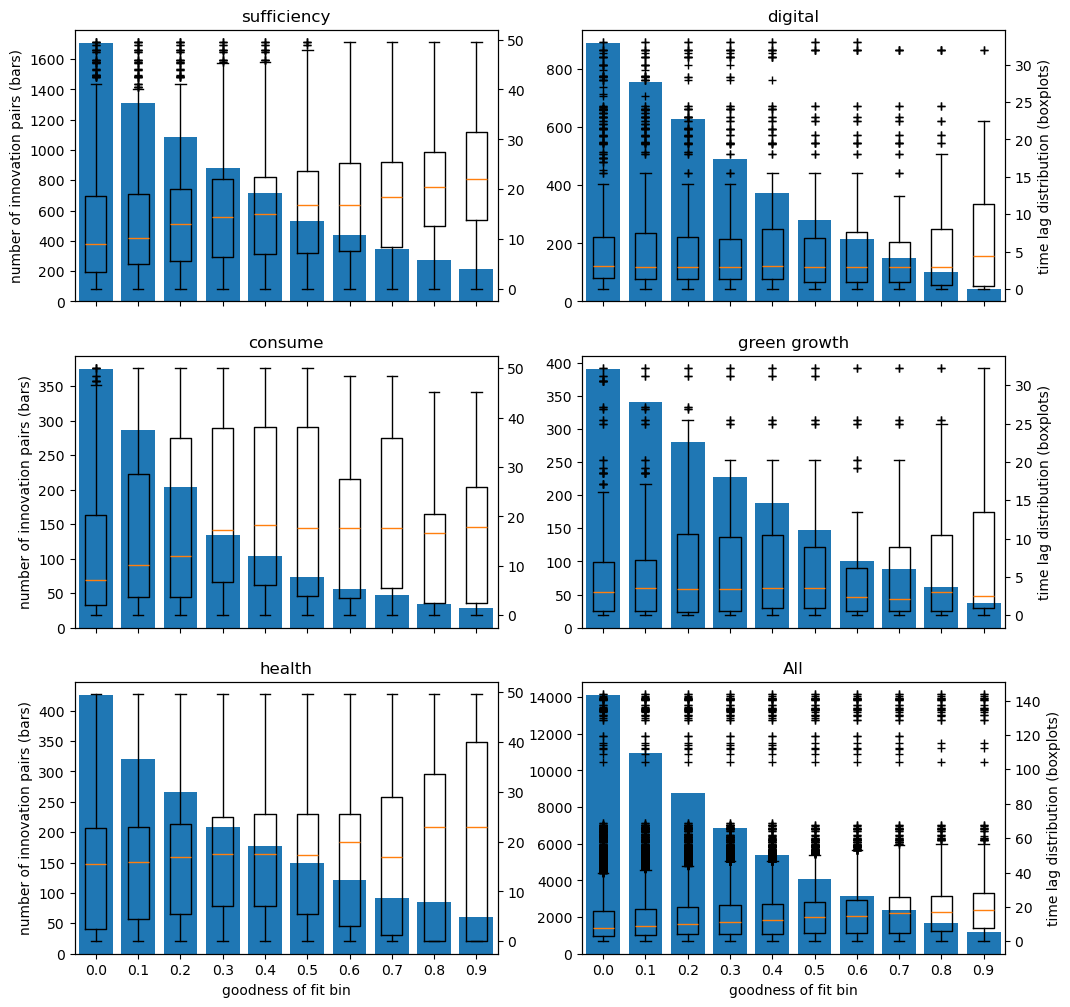

In [21]:
# Plot frequency of good fits for each cluster
fig, axs = plt.subplots(nrows=int(len(clusters)/2), ncols=2, figsize=(12,12), sharex='all')
goodnesses = [i/10 for i in range(10)]
ind = np.arange(1, len(goodnesses)+1)
metric = 'R_square'
indicator = '1.1'
for i, cluster in enumerate(clusters):
    data = []
    for g in goodnesses:
        data.append(coev.loc[(coev['indicator']==indicator)
                             & (coev['cluster']==cluster)
                             & (coev['i_ID']!=coev['j_ID'])
                             & (coev[metric]>g)
                             & (coev[metric].notna())])
    
    # Number of innovation pairs
    axs.flat[i].bar(ind, [len(df) for df in data])
    if i%2==0: axs.flat[i].set_ylabel('number of innovation pairs (bars)')

    # Time lag distribution
    ax2 = axs.flat[i].twinx()
    ax2.boxplot([df['time_lag'].abs() for df in data], sym='+')
    if i%2==1: ax2.set_ylabel('time lag distribution (boxplots)')
    
    axs.flat[i].set_title(cluster)
    axs.flat[i].set_xticks(ind, goodnesses)
    if i>=len(clusters)-2: axs.flat[i].set_xlabel('goodness of fit bin')

In [40]:
# best fitting time series for each innovation
metric = 'R_square'
coev_best = coev.sort_values(metric, ascending=False)\
            .groupby(['cluster', 'indicator', 'spatial', 'i_innovation'])\
            .apply(lambda g: g.loc[g['i_innovation']!=g['j_innovation']].head(1))
coev_best.reset_index(inplace=True, drop=True)
coev_best.head(3)

C:\Users\m.arnz\AppData\Local\Temp\ipykernel_14660\1718743917.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.loc[g['i_innovation']!=g['j_innovation']].head(1))


,adjustment,cluster,indicator,spatial,i_ID,j_ID,i_innovation,j_innovation,i_metric,j_metric,i_description,j_description,t0,Dt,K,R_square,R_square_adj,time_lag
0,Original data,All,1.1,Asia,China - cellphones - Cumulative Calculation - -,China - active mobility - Bicycle ownership - ...,cellphones,active mobility,-,# bikes per hundred households,Cumulative Calculation,Bicycle ownership,1999.660988,2.922144,1.620977e+08,0.396078,0.374509,-1.500000
1,Original data,All,1.1,Asia,Bangladesh - climate protest - cumulative Coun...,Beijing - active mobility - Bicycle modal shar...,climate protest,active mobility,cumulative # protest events,%,cumulative Count of protest events related to ...,Bicycle modal share,2018.761627,1.274225,1.043416e+02,0.979190,0.976693,19.333333
2,Original data,All,1.1,Asia,China - e-bikes - Total e-bike manufacturing v...,Beijing - active mobility - % trips by walking...,e-bikes,active mobility,# million,market share,Total e-bike manufacturing volumes,% trips by walking and biking,2012.322204,5.879616,3.319462e+01,0.997397,0.996096,21.333333


In [41]:
len(coev_best)

779

In [42]:
# Save best fits
coev_best.to_csv('data/results_coevolution_logistic_best_fits.csv')